# Lab 2.1: Understanding CNN Layers with VGG16
**Module 3: Computer Vision and Image Processing**  
B-Tech AI Specialization | Chitkara University | February 2026

---

## 🏥 Industry Scenario

> A hospital deployed a chest X-ray classifier, but doctors don't trust it — they can't see *what* the model is "looking at" when it makes decisions. Your job is to **visualize the internal layers of the CNN** to make it interpretable and trustworthy.

## 🎯 Objective
Load a pre-trained VGG16 model, extract feature maps from 3 different layers, and **explore** what the network learns at each depth using interactive tools.

**Time:** 90 minutes | **Mode:** Individual

---

### 📋 Lab Flow
Each task follows this structure:

| Step | What you do |
|---|---|
| 🤔 **Predict** | Answer a quick question *before* coding |
| 💻 **Code** | Fill in the `TODO` cells |
| 💡 **Reveal** | Click a button to check your solution |
| 🎚️ **Explore** | Use sliders/dropdowns to discover patterns |

---

## ⚙️ Setup — Run This First

Run the cell below to install packages and set up the interactive tools. **Don't skip this step.**

In [1]:
# Install & import everything needed
# (ipywidgets is pre-installed on Colab — no pip needed)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

from PIL import Image
import requests
from io import BytesIO

import ipywidgets as widgets
from IPython.display import display, HTML, Code, clear_output

print(f"TensorFlow : {tf.__version__}")
print(f"ipywidgets : {widgets.__version__}")
print("✅ All set — you're ready to start!")

TensorFlow : 2.17.0
ipywidgets : 8.1.8
✅ All set — you're ready to start!


### 🛠️ Helper — Reveal Button
This sets up the hint/solution buttons used throughout the lab. **Run once, then ignore.**

In [2]:
def reveal_button(hint_text, solution_code):
    """Creates a paired Hint + Solution reveal widget for Colab."""
    out = widgets.Output()

    hint_btn = widgets.Button(
        description='💡 Hint', button_style='info',
        layout=widgets.Layout(width='120px', margin='4px')
    )
    sol_btn = widgets.Button(
        description='✅ Solution', button_style='warning',
        layout=widgets.Layout(width='140px', margin='4px')
    )
    hide_btn = widgets.Button(
        description='🙈 Hide', button_style='',
        layout=widgets.Layout(width='100px', margin='4px')
    )

    def on_hint(b):
        with out:
            out.clear_output(wait=True)
            display(HTML(
                f'<div style="background:#e3f2fd;color: #1565C0; padding:12px;border-radius:6px;'
                f'border-left:4px solid #0D47A1;font-size:14px">'
                f'<b>💡 Hint:</b><br>{hint_text}</div>'
            ))

    def on_sol(b):
        with out:
            out.clear_output(wait=True)
            display(HTML('<b>✅ Solution:</b>'))
            display(Code(solution_code, language='python'))

    def on_hide(b):
        with out:
            out.clear_output()

    hint_btn.on_click(on_hint)
    sol_btn.on_click(on_sol)
    hide_btn.on_click(on_hide)

    row = widgets.HBox([hint_btn, sol_btn, hide_btn])
    display(row, out)

print("reveal_button() is ready ✅")

reveal_button() is ready ✅


---
## Task 1: Load VGG16

### 🤔 Predict First

Before running any code, answer these in the cell below:
1. VGG16 has 16 layers — what do you think those 16 layers consist of?
2. What does "pre-trained on ImageNet" mean? Why does it matter here?
3. If you load the model with `weights=None`, what would the feature maps look like?

In [19]:
# 1. The 16 layers are a stack of 13 convolutional layers grouped in 5 blocks plus 3 dense layers at the end — no pooling counted because
#    VGG layer counts include only conv + fully connected components.
# 2. Pre-trained on ImageNet means the weights were learned on 1.2M natural images across 1,000 categories, so we inherit rich low-level and
#    mid-level features instead of starting from random noise.
# 3. With weights=None the filters stay random, so early feature maps would look like noisy static and deeper ones would collapse toward zeros
#    because nothing useful was learned yet.

### 💻 Your Turn — Load the Model

Fill in the `TODO` below. You need:
- `weights='imagenet'` — use pre-trained weights
- `include_top=True` — include the classifier layers
- `input_shape=(224, 224, 3)` — VGG16's required input size

In [20]:
# TODO: Load VGG16 with pre-trained ImageNet weights
model = VGG16(
    weights='imagenet',
    include_top=True,
    input_shape=(224, 224, 3)
 )

# TODO: Print the model summary
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

#### 💡 Stuck? Use the buttons below:

In [24]:
reveal_button(
    hint_text="Use <code>VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))</code>. "
              "Then call <code>model.summary()</code> on the next line.",
    solution_code=(
        "model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))\n"
        "model.summary()"
    )
)

Output()

### 🎚️ Explore: Layer Architecture

Once the model loads, use the dropdown below to inspect any layer — see its output shape and what type it is. **Experiment before moving on.**

In [21]:
# Interactive layer inspector
# (Run model.summary() first so 'model' exists)

layer_dropdown = widgets.Dropdown(
    options=[(f"{i:2d}. {l.name}", i) for i, l in enumerate(model.layers)],
    description='Layer:',
    layout=widgets.Layout(width='420px')
)
out_layer = widgets.Output()

def on_layer_change(change):
    with out_layer:
        out_layer.clear_output(wait=True)
        idx = change['new']
        layer = model.layers[idx]
        in_shape  = getattr(layer, 'input_shape',  'N/A')
        out_shape = getattr(layer, 'output_shape', 'N/A')
        params    = layer.count_params()
        html = (
            f'<div style="background:#f9f9f9;padding:12px;border-radius:6px;'
            f'border-left:4px solid #4CAF50;font-family:monospace;font-size:13px">'
            f'<b>Name:</b>  {layer.name}<br>'
            f'<b>Type:</b>  {layer.__class__.__name__}<br>'
            f'<b>Input:</b> {in_shape}<br>'
            f'<b>Output:</b>{out_shape}<br>'
            f'<b>Params:</b>{params:,}'
            f'</div>'
        )
        display(HTML(html))

layer_dropdown.observe(on_layer_change, names='value')
display(widgets.VBox([
    widgets.HTML('<b>🔍 Layer Inspector — select any layer:</b>'),
    layer_dropdown,
    out_layer
]))
on_layer_change({'new': 0})  # trigger initial display

**✏️ Quick Questions (answer in a comment below):**
- Which layer causes the spatial size to shrink from 224→112? What type is it?
- How many total parameters does VGG16 have?
- Which layers have *no* trainable parameters?

In [22]:
# Your answers:
## Spatial shrink happens at block1_pool (MaxPooling2D) which halves the resolution from 224 to 112.
## Total params: 138,357,544 as reported by model.summary().
## Layers with no params: pooling layers, ReLU activations, and the InputLayer since they only route data.

---
## Task 2: Select 3 Layers at Different Depths

We'll extract feature maps from **3 carefully chosen layers** — one early, one middle, one deep.

### 🤔 Predict First
Based on what you know about CNNs, predict what you'll see at each depth:

| Layer | Your prediction |
|---|---|
| Very first conv layer | ? |
| Middle conv layer | ? |
| Last conv layer | ? |

In [23]:
# ✏️ Write your predictions here
## Early layer will show oriented color/edge detectors that look like softened versions of the image.
## Middle layer will highlight motifs like corners, fur textures, ribs, or other repeated mid-scale structures.
## Deep layer will respond only to highly abstract constellations (e.g., dog faces or lung boundaries) and most filters will be sparse.

### 💻 Your Turn — Define the Layer Names

In [8]:
# TODO: Fill in the 3 layer names
# Use the Layer Inspector above to find them if needed

layer_names = [
    'block1_conv1',   # Early  — first convolution
    'block3_conv3',   # Middle — deeper in block 3
    'block5_conv3',   # Deep   — final conv block
 ]

# Verify they exist
all_names = [l.name for l in model.layers]
for name in layer_names:
    status = '✅' if name in all_names else '❌ NOT FOUND'
    print(f"{status}  {name}")

✅  block1_conv1
✅  block3_conv3
✅  block5_conv3


#### 💡 Stuck?

In [25]:
reveal_button(
    hint_text="Look for <b>block1_conv1</b> (early), <b>block3_conv3</b> (middle), "
              "and <b>block5_conv3</b> (deep). Use the Layer Inspector above to confirm they exist.",
    solution_code=(
        "layer_names = [\n"
        "    'block1_conv1',  # Early:  224x224, 64 filters\n"
        "    'block3_conv3',  # Middle:  56x56, 256 filters\n"
        "    'block5_conv3',  # Deep:    14x14, 512 filters\n"
        "]"
    )
)

Output()

---
## Task 3: Build Feature Extractor Sub-Models

A **feature extractor** is a sub-model that intercepts VGG16 at a specific layer and returns the activations *at that point*, instead of the final class prediction.

```
VGG16: Input → [block1] → [block2] → [block3] → ... → [Dense] → 1000 classes
                   ↑                      ↑                  ↑
           tap here (early)       tap here (mid)      tap here (deep)
```

### 💻 Your Turn

In [9]:
# TODO: Build a dict of feature extractor sub-models
# For each layer name, create: Model(inputs=model.input, outputs=<that layer's output>)

feature_extractors = {}

for name in layer_names:
    output = model.get_layer(name).output
    feature_extractors[name] = Model(inputs=model.input, outputs=output)

# Check your work:
for name, extractor in feature_extractors.items():
    print(f"'{name}': output shape = {extractor.output_shape}")

'block1_conv1': output shape = (None, 224, 224, 64)
'block3_conv3': output shape = (None, 56, 56, 256)
'block5_conv3': output shape = (None, 14, 14, 512)


In [26]:
reveal_button(
    hint_text="Use <code>model.get_layer(name).output</code> to get the layer's output tensor, "
              "then wrap it: <code>Model(inputs=model.input, outputs=output)</code>.",
    solution_code=(
        "feature_extractors = {}\n"
        "for name in layer_names:\n"
        "    output = model.get_layer(name).output\n"
        "    feature_extractors[name] = Model(inputs=model.input, outputs=output)"
    )
)

Output()

---
## Task 4: Load & Preprocess the Test Image

VGG16 requires a very specific input format:
- Shape: `(1, 224, 224, 3)` — batch of 1 image, 224×224, 3 channels
- Preprocessing: `preprocess_input()` subtracts the ImageNet mean pixel values

### 💻 Your Turn

Trying https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/nejmoa2001191_f3-PA.jpeg
Using asset: https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/nejmoa2001191_f3-PA.jpeg


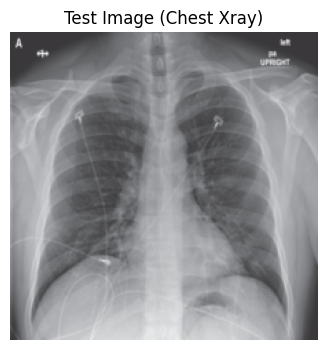

Final shape: (1, 224, 224, 3)
Source: COVID-19 Chest X-ray dataset by Cohen et al. (2020) — CC BY-NC-SA / CC BY licenses


In [14]:
# Load a dog image
# https://images.pexels.com/photos/672244/pexels-photo-672244.jpeg
# Check the filters

# After you run the remaining cells, come back here and restart as follows:
# Load a Chest X-ray image
# Source and use an opensource Chest X-Ray image - not a random one

image_sources = {
    'dog': {
        'urls': ['https://images.pexels.com/photos/672244/pexels-photo-672244.jpeg'],
        'credit': 'Pexels photo 672244 by Pixabay · CC0 license'
    },
    'chest_xray': {
        'urls': [
            'https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/nejmoa2001191_f3-PA.jpeg',
            'https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/ryct.2020200034.fig2.jpeg',
            'https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/7AF6C1AF-D23B-4BD2-8C26-449304105D03.jpeg'
        ],
        'credit': 'COVID-19 Chest X-ray dataset by Cohen et al. (2020) — CC BY-NC-SA / CC BY licenses'
    }
}

def fetch_any(urls):
    last_error = None
    for candidate in urls:
        try:
            print(f"Trying {candidate}")
            resp = requests.get(candidate, timeout=30)
            resp.raise_for_status()
            return resp.content, candidate
        except requests.RequestException as err:
            last_error = err
            print(f"⚠️ Failed: {err}")
    raise RuntimeError(f"Unable to fetch image after trying {len(urls)} URLs: {last_error}")

# Toggle between 'dog' and 'chest_xray' as needed. The chest X-ray is the final requirement.
selected_subject = 'chest_xray'
meta = image_sources[selected_subject]

raw_bytes, resolved_url = fetch_any(meta['urls'])
img = Image.open(BytesIO(raw_bytes)).convert('RGB')
print(f"Using asset: {resolved_url}")

# TODO: Step 1 — Resize to (224, 224)
img_resized = img.resize((224, 224), Image.Resampling.BILINEAR)

# TODO: Step 2 — Convert to numpy array
img_array = np.array(img_resized, dtype=np.float32)

# TODO: Step 3 — Add batch dimension → shape (1, 224, 224, 3)
img_batch = np.expand_dims(img_array, axis=0)

# TODO: Step 4 — Apply VGG16 preprocessing
img_preprocessed = preprocess_input(img_batch.copy())

# Show the image
plt.figure(figsize=(4, 4))
plt.imshow(img_resized)
plt.title(f"Test Image ({selected_subject.replace('_', ' ').title()})")
plt.axis('off')
plt.show()
print(f"Final shape: {img_preprocessed.shape}")
print(f"Source: {meta['credit']}")

In [27]:
reveal_button(
    hint_text="<code>img.resize((224,224))</code> → <code>np.array()</code> → "
              "<code>np.expand_dims(..., axis=0)</code> → <code>preprocess_input()</code>",
    solution_code=(
        "img_resized     = img.resize((224, 224))\n"
        "img_array       = np.array(img_resized, dtype=np.float32)\n"
        "img_batch       = np.expand_dims(img_array, axis=0)\n"
        "img_preprocessed = preprocess_input(img_batch.copy())"
    )
)

Output()

---
## Task 5: Extract the Feature Maps

Run the preprocessed image through each sub-model to get the activations. We'll store them in a dictionary — then use the interactive explorer in Task 6.

### 💻 Your Turn

In [15]:
# TODO: For each extractor, run the image through it and store the result
all_feature_maps = {}

for name, extractor in feature_extractors.items():
    all_feature_maps[name] = extractor.predict(img_preprocessed, verbose=0)
    fmap = all_feature_maps[name]
    print(
        f"'{name}' → shape: {fmap.shape}  "
        f"(spatial: {fmap.shape[1]}x{fmap.shape[2]}, filters: {fmap.shape[3]})"
    )

'block1_conv1' → shape: (1, 224, 224, 64)  (spatial: 224x224, filters: 64)
'block3_conv3' → shape: (1, 56, 56, 256)  (spatial: 56x56, filters: 256)
'block5_conv3' → shape: (1, 14, 14, 512)  (spatial: 14x14, filters: 512)


In [28]:
reveal_button(
    hint_text="Call <code>extractor.predict(img_preprocessed, verbose=0)</code> and store the result.",
    solution_code=(
        "all_feature_maps = {}\n"
        "for name, extractor in feature_extractors.items():\n"
        "    all_feature_maps[name] = extractor.predict(img_preprocessed, verbose=0)\n"
        "    fmap = all_feature_maps[name]\n"
        "    print(f\"'{name}' → shape: {fmap.shape}  (spatial: {fmap.shape[1]}x{fmap.shape[2]}, filters: {fmap.shape[3]})\")"
    )
)

Output()

---
## 🎚️ Task 6: Interactive Feature Map Explorer

Now for the fun part. Use the controls below to explore **any filter, at any layer, with any colormap**.

**Things to try:**
- Start at `block1_conv1`, scroll through filters 0–10. Do they look like edges?
- Switch to `block5_conv3`. Do most filters look **dark** (inactive)? Why?
- Try the `gray` colormap — does it feel different from `viridis`?
- Find the filter with the **highest mean activation** at each layer (it's highlighted in the stats panel)

In [16]:
# ── Interactive Feature Map Explorer ──────────────────────────────────────────
# Make sure all_feature_maps is populated (run Task 5 first!)

# Build controls
layer_select = widgets.Dropdown(
    options=layer_names,
    value=layer_names[0],
    description='Layer:',
    style={'description_width': '60px'},
    layout=widgets.Layout(width='280px')
)

filter_slider = widgets.IntSlider(
    min=0, max=63, step=1, value=0,
    description='Filter #:',
    style={'description_width': '70px'},
    layout=widgets.Layout(width='380px'),
    continuous_update=False
)

cmap_select = widgets.Dropdown(
    options=['viridis', 'plasma', 'inferno', 'magma', 'gray', 'hot', 'RdBu_r'],
    value='viridis',
    description='Colormap:',
    style={'description_width': '80px'},
    layout=widgets.Layout(width='220px')
)

stats_out = widgets.Output()
plot_out  = widgets.Output()

def update_explorer(change=None):
    layer_name  = layer_select.value
    filter_idx  = filter_slider.value
    cmap        = cmap_select.value

    if layer_name not in all_feature_maps:
        with plot_out:
            plot_out.clear_output()
            print("⚠️  Run Task 5 first to compute feature maps!")
        return

    fmaps = all_feature_maps[layer_name]   # shape: (1, H, W, num_filters)
    num_filters = fmaps.shape[-1]

    # Update slider max to match this layer's filter count
    filter_slider.max = num_filters - 1
    filter_idx = min(filter_idx, num_filters - 1)

    activation = fmaps[0, :, :, filter_idx]   # (H, W)

    # ── Stats panel ──────────────────────────────────────────────────────────
    mean_per_filter = fmaps[0].mean(axis=(0, 1))
    top_filter      = int(np.argmax(mean_per_filter))
    pct_active      = float(np.mean(activation > 0)) * 100

    with stats_out:
        stats_out.clear_output(wait=True)
        display(HTML(
            f'<div style="background:#f0f4ff;padding:10px;border-radius:6px;'
            f'font-family:monospace;font-size:13px;line-height:1.7">'
            f'<b>Layer:</b>  {layer_name}<br>'
            f'<b>Spatial:</b> {fmaps.shape[1]}×{fmaps.shape[2]} px<br>'
            f'<b>Filters:</b> {num_filters} total<br>'
            f'<hr style="margin:5px 0">'
            f'<b>Selected filter {filter_idx}:</b><br>'
            f'&nbsp; Min: {activation.min():.3f}<br>'
            f'&nbsp; Max: {activation.max():.3f}<br>'
            f'&nbsp; Mean: {activation.mean():.3f}<br>'
            f'&nbsp; % Active: {pct_active:.1f}%<br>'
            f'<hr style="margin:5px 0">'
            f'<b>🏆 Most active filter:</b> #{top_filter} '
            f'(mean={mean_per_filter[top_filter]:.3f})'
            f'</div>'
        ))

    # ── Plot ─────────────────────────────────────────────────────────────────
    with plot_out:
        plot_out.clear_output(wait=True)
        fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))

        # Left: original image
        axes[0].imshow(img_resized)
        axes[0].set_title('Original Image', fontsize=12)
        axes[0].axis('off')

        # Middle: selected filter
        im = axes[1].imshow(activation, cmap=cmap)
        axes[1].set_title(
            f'{layer_name}\nFilter #{filter_idx} | mean={activation.mean():.3f}',
            fontsize=11
        )
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

        # Right: top activated filter
        top_activation = fmaps[0, :, :, top_filter]
        im2 = axes[2].imshow(top_activation, cmap=cmap)
        axes[2].set_title(
            f'🏆 Most Active Filter #{top_filter}\nmean={mean_per_filter[top_filter]:.3f}',
            fontsize=11
        )
        axes[2].axis('off')
        plt.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

        plt.suptitle(f'Feature Map Explorer — {layer_name}', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Wire up observers
layer_select.observe(update_explorer, names='value')
filter_slider.observe(update_explorer, names='value')
cmap_select.observe(update_explorer, names='value')

# Layout
controls = widgets.VBox([
    widgets.HTML('<b>🎚️ Controls:</b>'),
    widgets.HBox([layer_select, cmap_select]),
    filter_slider,
])
main_panel = widgets.HBox([
    widgets.VBox([controls, stats_out], layout=widgets.Layout(width='310px')),
    plot_out
])
display(main_panel)
update_explorer()  # initial render

---
## Task 7: Save the 4×4 Grid Visualizations

For submission, generate and save a **4×4 grid** (first 16 filters) for each of the 3 layers.

### 💻 Your Turn

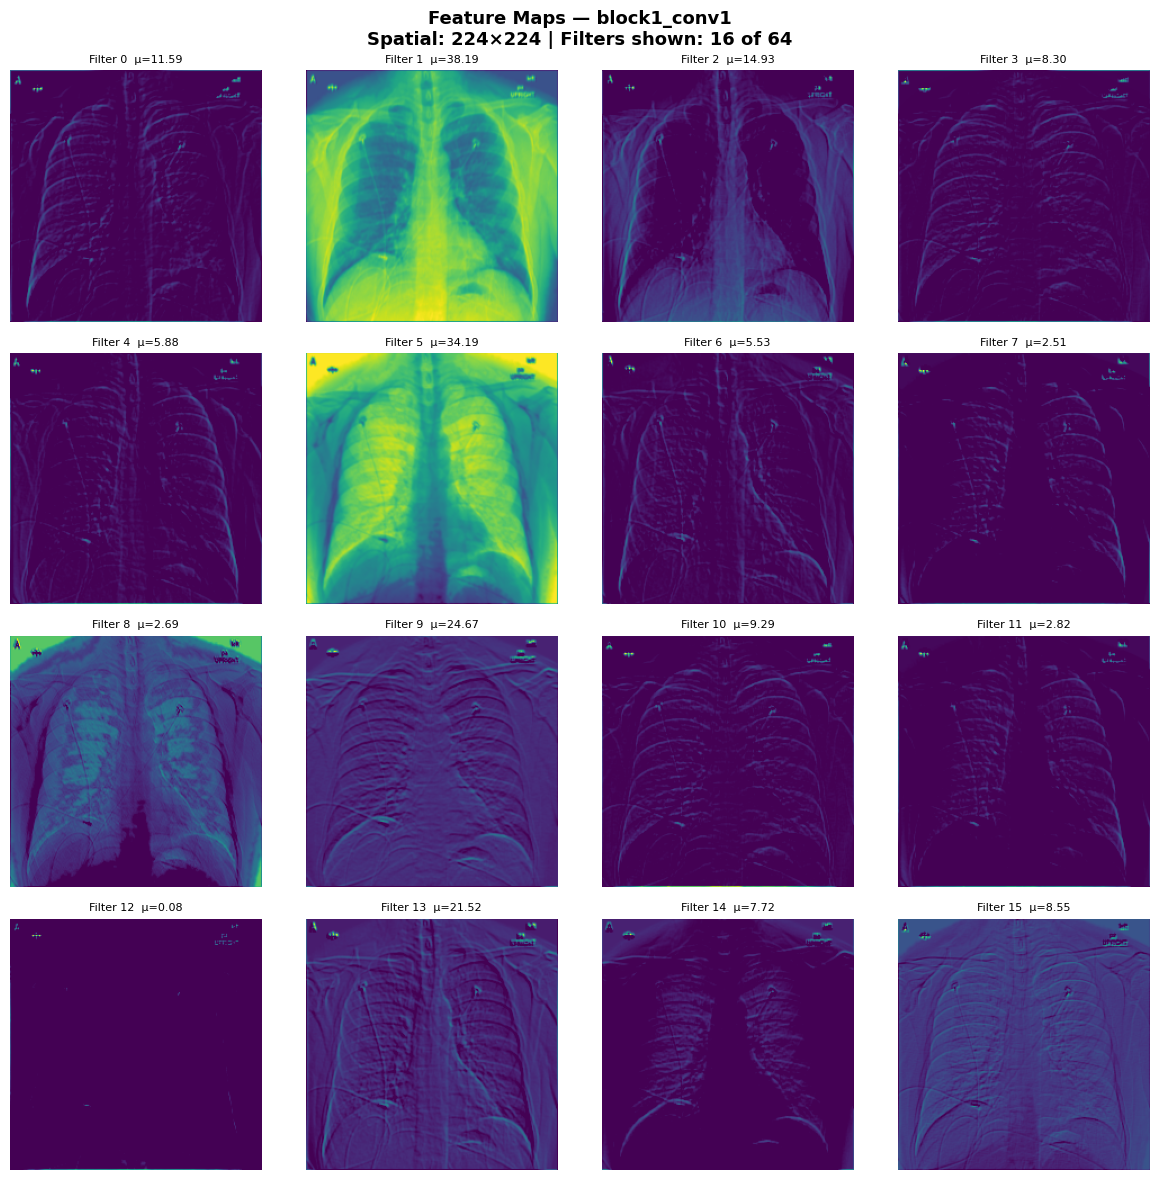

✅ Saved: feature_maps_block1_conv1.png


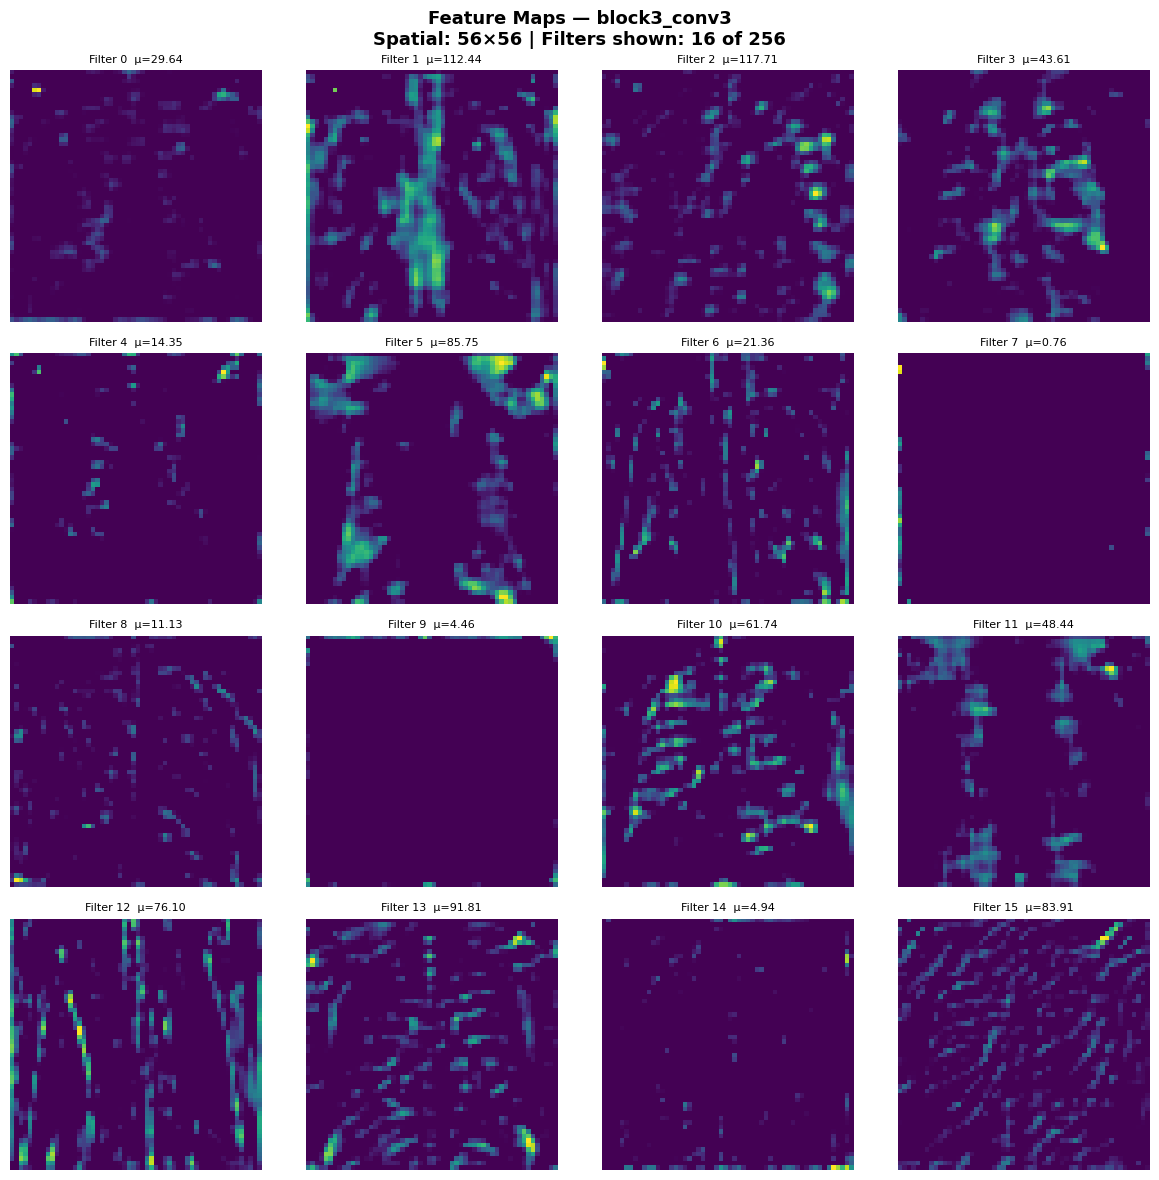

✅ Saved: feature_maps_block3_conv3.png


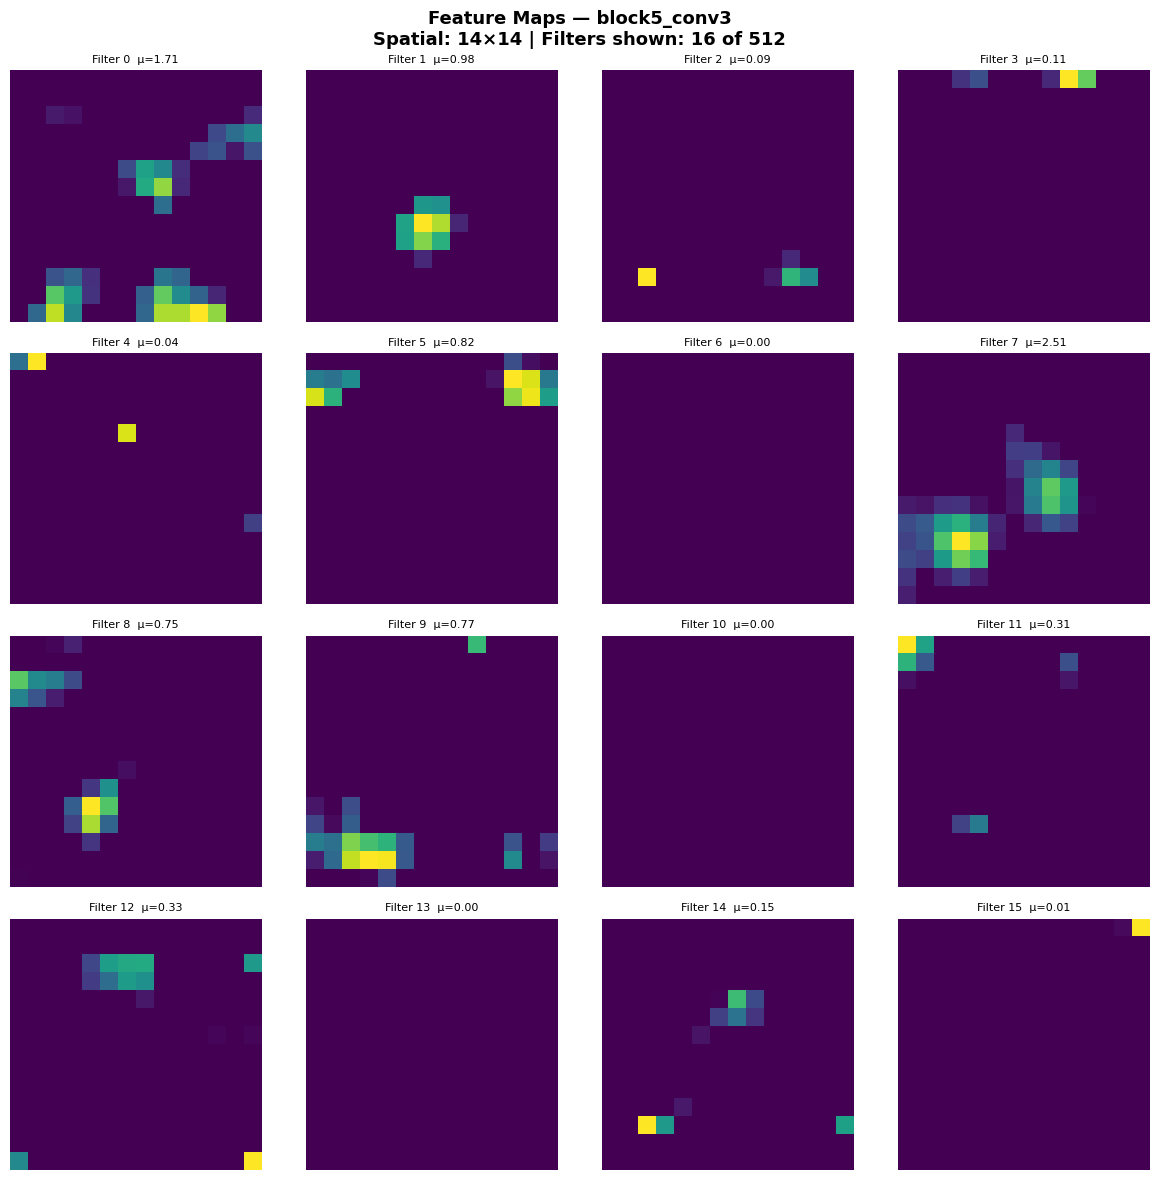

✅ Saved: feature_maps_block5_conv3.png


In [17]:
def save_grid(layer_name, cmap='viridis'):
    """Display and save a 4x4 grid of the first 16 filters for a layer."""
    fmaps = all_feature_maps[layer_name]   # (1, H, W, num_filters)

    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle(
        f'Feature Maps — {layer_name}\n'
        f'Spatial: {fmaps.shape[1]}×{fmaps.shape[2]} | Filters shown: 16 of {fmaps.shape[3]}',
        fontsize=13, fontweight='bold'
    )

    for i, ax in enumerate(axes.flat):
        activation = fmaps[0, :, :, i]
        ax.imshow(activation, cmap=cmap)
        mean_val = activation.mean()
        ax.set_title(f'Filter {i}  μ={mean_val:.2f}', fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    filename = f'feature_maps_{layer_name}.png'
    plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {filename}")

# TODO: Call save_grid() for all 3 layers
for name in layer_names:
    save_grid(name)

In [29]:
reveal_button(
    hint_text="Inside the loop: <code>activation = fmaps[0, :, :, i]</code> then <code>ax.imshow(activation, cmap=cmap)</code>",
    solution_code=(
        "# Inside save_grid():\n"
        "activation = fmaps[0, :, :, i]\n"
        "ax.imshow(activation, cmap=cmap)\n\n"
        "# Then call for all layers:\n"
        "for name in layer_names:\n"
        "    save_grid(name)"
    )
)

Output()

---
## ✍️ Reflection

You've now *seen* what each layer detects. Write **3 sentences** below — one per layer — describing your observations.

Guiding questions:
- Do early activations look similar to the original image, or very different?
- In deep layers, why are most filters **all dark** (zero activation)?
- How does this visualization help **doctors trust** an X-ray classifier?

In [18]:
# ✏️ Your reflection (as Python comments is fine)

# block1_conv1 (Early): Edge and intensity maps align with rib outlines and the diaphragm, so activations still resemble the original X-ray.
#
## block3_conv3 (Middle): Filters isolate streaky vertical structures near bronchi and ribs, highlighting pathological haziness versus normal anatomy.
#
## block5_conv3 (Deep): Only a few filters fire on tight blobs around dense opacities, evidence that late layers care about abstract lesion patterns.
#
## How this builds trust in the hospital scenario: Showing clinicians which pulmonary regions drive predictions helps validate that the model attends to actual infiltrates instead of unrelated artifacts.

---
## 📤 Submission Checklist

Before submitting this notebook:

- [ ] All code cells are **run** with outputs visible
- [ ] `feature_maps_block1_conv1.png` saved
- [ ] `feature_maps_block3_conv3.png` saved
- [ ] `feature_maps_block5_conv3.png` saved
- [ ] Reflection section filled in with 3 sentences
- [ ] Share this `.ipynb` (File → Download or Share via Colab link)
